Для начала необходимо выполнить подключение всех необходимых инструментов.

In [4]:
!pip install tf-keras-vis

Также подключаем необходимые библиотеки.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 as Model

Загрузим 4 различных изобрадения и отобразим их.

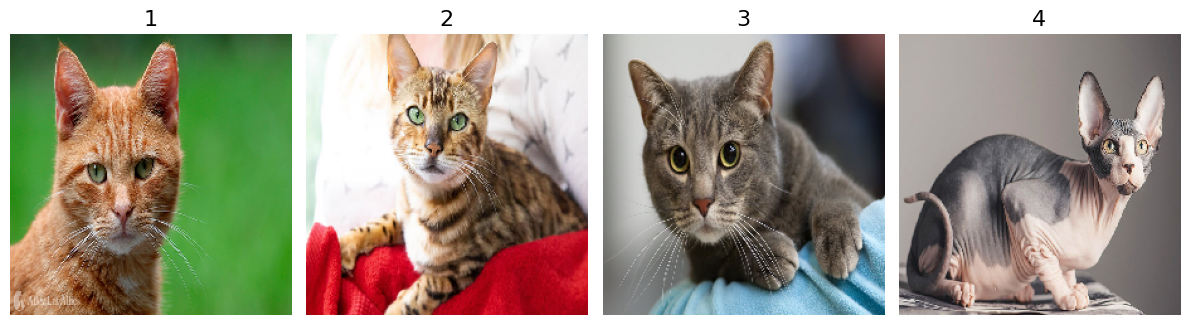

In [6]:
model = Model(weights='imagenet', include_top=True)

imgTitleList = ['1', '2', '3', '4']

imgPathList = ['1.jpg', '2.jpg', '3.jpg', '4.jpg']

imgArr = np.asarray([np.array(load_img(imgPath, target_size=(224, 224))) for imgPath in imgPathList])

X = preprocess_input(imgArr)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

ReplaceToLinear

In [7]:

replace2linear = ReplaceToLinear()
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

score = CategoricalScore([41, 42, 62, 63])
def score_function(output):
    return (output[0][41], output[1][42], output[2][62], output[3][63])

Отобразим карты значимости

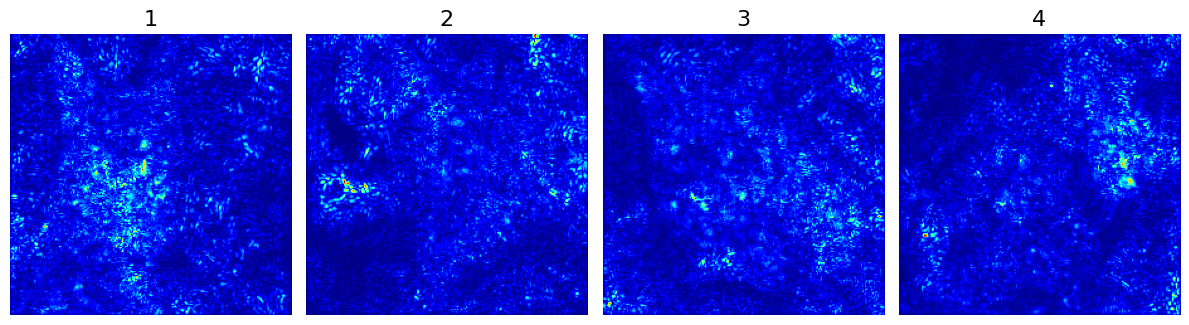

In [8]:

saliency = Saliency(model,model_modifier=replace2linear,clone=True)
mapList = saliency(score, X)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

SmoothGrad

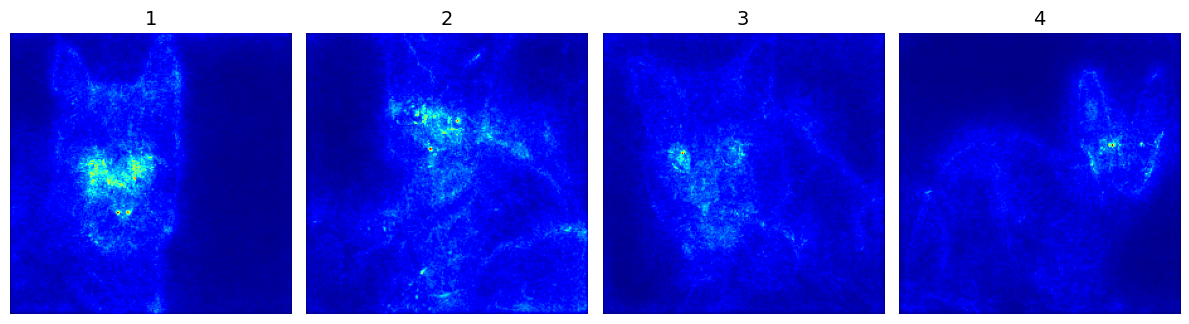

In [9]:

mapList = saliency(score,X,smooth_samples=20,smooth_noise=0.20)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

GrandCAM

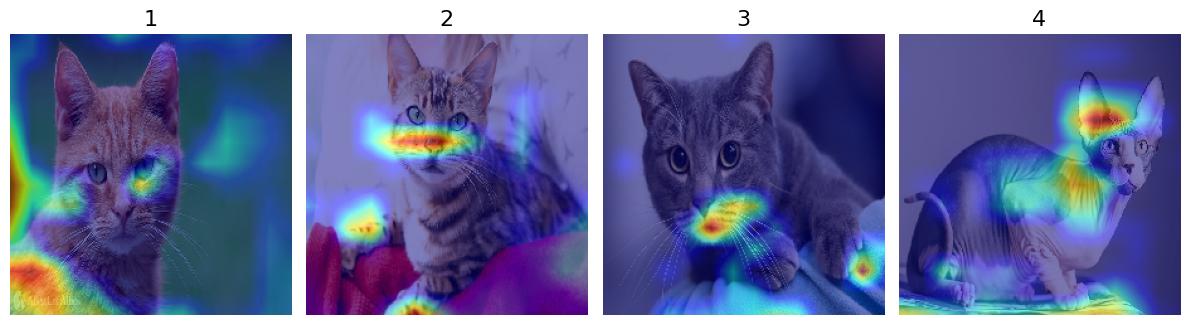

In [10]:


gradcam = Gradcam(model,model_modifier=replace2linear,clone=True)
mapList = gradcam(score,X,penultimate_layer=-1)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for i, title in enumerate(imgTitleList):
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')

plt.tight_layout()
plt.show()

GrandCAM++

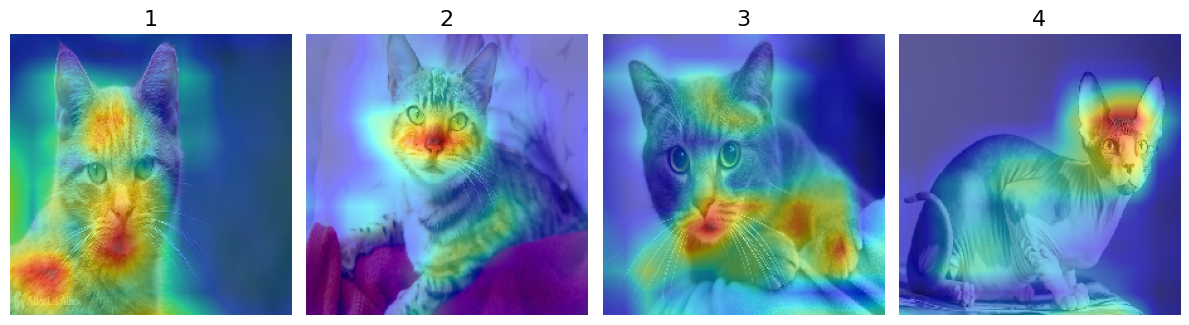

In [11]:

gradcam = GradcamPlusPlus(model,model_modifier=replace2linear,clone=True)
mapList = gradcam(score,X,penultimate_layer=-1)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for i, title in enumerate(imgTitleList):
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')

plt.tight_layout()
plt.show()

Модификаторы None, guided, relu могут влиять на способ вычисления градиентов и, таким образом, на результаты визуализации.
Применение функций активации relu в модификаторах может изменять визуализацию и помогать понять, какие части модели более активны.
Визуализация двух изображений  может помочь в понимании того, как разные входные данные активируют различные части нейронной сети.
Используется фильтр с индексом 20 для анализа, как нейронная сеть реагирует на конкретные классы объектов.